In [126]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [128]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [129]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.21111811208928 99.32924677741613
-89.06655848710086 -124.0984264180803
-75.22340322847235 76.10717531310553
28.383680683826782 28.378014353722705
-15.153688697466663 156.03172362215798
-45.70517303670581 -50.217324021342364
87.29085857687585 -97.03157835228069
-3.147737163892714 -47.3670355490672
80.48746131423593 50.01861660358776
31.760794032380275 87.03267534573877
61.94845438101268 51.16763478916292
-16.897863320044777 -35.14162065424824
74.77747621234369 -37.4444848869241
62.38187473194742 96.40240960587926
-45.03819809978311 -104.4805471817234
-59.160748674305694 -124.76245533384554
12.256560120979273 106.68107633669956
44.13437203967172 -93.55295424832053
-43.32691633204757 24.31241915089734
24.14498021772185 -17.557422861988215
53.47699586450793 127.9557402738887
-2.050166610102437 3.714491662265175
50.1623579835788 -77.85193126939983
-18.305377904974833 -8.618161471826625
67.48207927425611 107.98611555654679
21.983372707631403 139.62537743041497
20.923627914008904 -118.3720

32.344259586973095 176.5829424590953
-0.8370415112650988 142.74108326543126
-19.91128835143462 155.6792579944348
-8.45535562483549 80.56091465049212
34.118554423291044 -127.75297215004143
-71.73099245106128 155.72628850318483
51.68298999545186 -8.635364864408274
-15.514636334621926 -143.64352765471352
12.752053266709893 -26.412066737013873
81.05891504328028 163.88907842288705
-24.56469314895803 -124.77168213906256
-73.44579701480643 -27.204823965799477
-16.784257372256917 171.0344820072752
62.6523093965975 -58.417170553720595
72.56514613545542 60.027493835407824
24.165285941517297 54.8536817782967
-15.20245701020697 -39.43192139331293
-19.316082870009822 -112.66568634177345
-64.42638799464899 34.531644707355355
25.820598417447698 -54.43059565702437
-5.861187685076331 1.6630678134268635
47.4459599130584 159.42263288232152
85.73165921139292 41.61144275315573
47.827700622189695 -147.50247279030964
-5.421556769118496 6.105565142888423
-76.69095268717115 8.715084730597965
73.04203181152533 

41.20191957631232 -166.26737242080284
68.50929740108148 -133.25859358689826
-59.722680814744805 -20.196252509367497
-28.918010290574493 -100.40579143936294
-38.369705814128345 -8.116003351418186
-69.27654630102813 -106.35264425857287
0.3691180128385412 122.23985290449139
40.778571007186315 1.026127009458321
-5.193908085076018 -105.39626172419766
-79.16866626787714 10.673274299185579
-21.90616397795182 119.87864206497676
56.677772593387004 -128.2512069970761
15.143825738355801 -161.51687653815011
41.96585973407596 -179.6515470056315
-49.418154389794374 -172.54105302507475
71.8721309507554 -132.956070243425
-47.97622708867943 -103.22025358582042
52.55146823011222 107.16406284670376
16.001648891638695 85.32718855601598
88.8892513208028 112.48866562585278
40.31132151001742 114.25596864547799
46.6333665937114 -28.984183188748204
-30.06334582766997 163.30946383223636
39.914746083650044 114.81596367439636
67.56243377014522 58.8107163092904
79.51247461451084 113.88770595231813
13.4952147000129

In [130]:
from citipy import citipy

In [131]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [132]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [133]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [134]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [135]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhangye
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | matay
Processing Record 5 of Set 1 | honiara
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | paragominas
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | kathmandu
Processing Record 11 of Set 1 | sedkyrkeshch
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | baykit
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | senmonorom
City not found. Skipping...
Processing Record 18 of Set 1 | waseca
Processing Record 19 of Set 1 | plettenberg bay
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | zeya
Processing Reco

Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | santa ines
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | champerico
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | chimbote
Processing Record 46 of Set 4 | buraydah
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | rairangpur
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | waingapu
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | coruripe
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | batemans bay
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | merauke
Processing Record 9 of Set 5 | marsassoum
Processing Record 10 of Set 5 | chicama
Processing Record 11 

Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | lodja
Processing Record 31 of Set 8 | san rafael
Processing Record 32 of Set 8 | melong
Processing Record 33 of Set 8 | baikunthpur
Processing Record 34 of Set 8 | gornopravdinsk
Processing Record 35 of Set 8 | san policarpo
Processing Record 36 of Set 8 | lysa hora
Processing Record 37 of Set 8 | chuy
Processing Record 38 of Set 8 | inongo
Processing Record 39 of Set 8 | lerwick
Processing Record 40 of Set 8 | elizabeth city
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | vostok
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | manavalakurichi
Processing Record 46 of Set 8 | bairiki
Processing Record 47 of Set 8 | londonderry
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | komsomolskiy
Processing Record 50 of Set 8 | urengoy
Processing Record 1 of Set 9 | vichayal
City not found. Skipping...
P

Processing Record 17 of Set 12 | lacarak
Processing Record 18 of Set 12 | coquimbo
Processing Record 19 of Set 12 | onega
Processing Record 20 of Set 12 | kawhia
Processing Record 21 of Set 12 | port-cartier
Processing Record 22 of Set 12 | celica
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | port shepstone
Processing Record 25 of Set 12 | aleksandrov gay
Processing Record 26 of Set 12 | wukari
Processing Record 27 of Set 12 | haibowan
City not found. Skipping...
Processing Record 28 of Set 12 | coalcoman
City not found. Skipping...
Processing Record 29 of Set 12 | the valley
Processing Record 30 of Set 12 | srednekolymsk
Processing Record 31 of Set 12 | pavda
City not found. Skipping...
Processing Record 32 of Set 12 | san cristobal
Processing Record 33 of Set 12 | kilvelur
Processing Record 34 of Set 12 | burkhala
City not found. Skipping...
Processing Record 35 of Set 12 | sobolevo
Processing Record 36 of Set 12 | orlik
Processing Record 37 of Set 12 | us

In [136]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhangye,38.9342,100.4517,65.95,74,100,13.04,CN,2022-07-14 23:44:53
1,Punta Arenas,-53.1500,-70.9167,32.11,93,75,4.61,CL,2022-07-14 23:42:32
2,Busselton,-33.6500,115.3333,58.39,79,54,11.21,AU,2022-07-14 23:44:54
3,Matay,28.4190,30.7792,74.70,54,0,14.25,EG,2022-07-14 23:44:54
4,Honiara,-9.4333,159.9500,86.22,57,90,3.02,SB,2022-07-14 23:44:55
5,Mar Del Plata,-38.0023,-57.5575,54.09,98,100,8.01,AR,2022-07-14 23:42:02
6,Qaanaaq,77.4840,-69.3632,46.71,81,48,7.65,GL,2022-07-14 23:44:55
7,Paragominas,-2.9667,-47.4833,72.68,94,41,4.12,BR,2022-07-14 23:44:56
8,Kathmandu,27.7167,85.3167,70.02,94,75,3.44,NP,2022-07-14 23:42:58
9,Sedkyrkeshch,61.7500,50.9167,64.67,100,100,4.47,RU,2022-07-14 23:44:56


In [137]:
city_data_new_df = city_data_df.reindex(columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])


In [138]:
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhangye,CN,2022-07-14 23:44:53,38.9342,100.4517,65.95,74,100,13.04
1,Punta Arenas,CL,2022-07-14 23:42:32,-53.1500,-70.9167,32.11,93,75,4.61
2,Busselton,AU,2022-07-14 23:44:54,-33.6500,115.3333,58.39,79,54,11.21
3,Matay,EG,2022-07-14 23:44:54,28.4190,30.7792,74.70,54,0,14.25
4,Honiara,SB,2022-07-14 23:44:55,-9.4333,159.9500,86.22,57,90,3.02
5,Mar Del Plata,AR,2022-07-14 23:42:02,-38.0023,-57.5575,54.09,98,100,8.01
6,Qaanaaq,GL,2022-07-14 23:44:55,77.4840,-69.3632,46.71,81,48,7.65
7,Paragominas,BR,2022-07-14 23:44:56,-2.9667,-47.4833,72.68,94,41,4.12
8,Kathmandu,NP,2022-07-14 23:42:58,27.7167,85.3167,70.02,94,75,3.44
9,Sedkyrkeshch,RU,2022-07-14 23:44:56,61.7500,50.9167,64.67,100,100,4.47


In [139]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [140]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

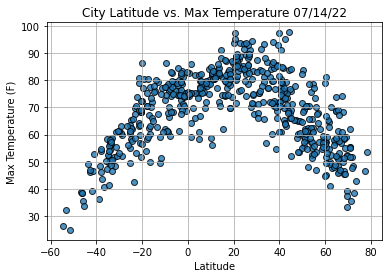

In [141]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

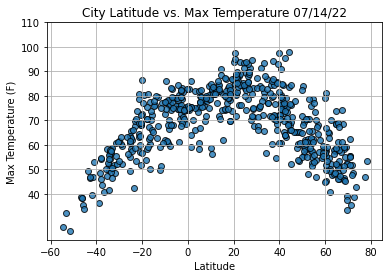

In [142]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.yticks( range(40,120,10) )
# Incorporate the other graph properties.
# Setting the interval of ticks of y-axis to 10.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

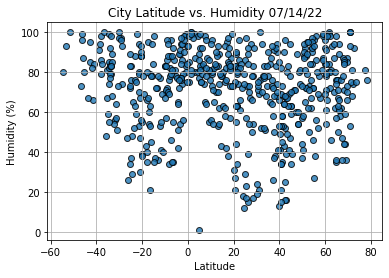

In [143]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

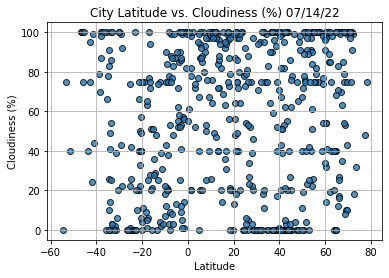

In [144]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

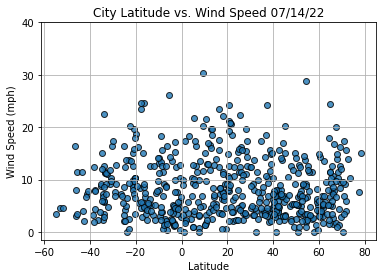

In [145]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.yticks( range(0,50,10) )
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [146]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

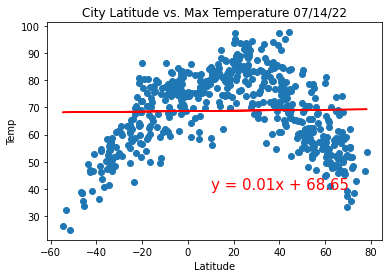

In [147]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [151]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [153]:
index13 = city_data_df.loc[13]
print(index13)

City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    58.35
Humidity                       76
Cloudiness                     42
Wind Speed                   4.23
Country                        BR
Date          2022-07-14 23:44:58
Name: 13, dtype: object


In [152]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhangye,38.9342,100.4517,65.95,74,100,13.04,CN,2022-07-14 23:44:53
3,Matay,28.4190,30.7792,74.70,54,0,14.25,EG,2022-07-14 23:44:54
6,Qaanaaq,77.4840,-69.3632,46.71,81,48,7.65,GL,2022-07-14 23:44:55
8,Kathmandu,27.7167,85.3167,70.02,94,75,3.44,NP,2022-07-14 23:42:58
9,Sedkyrkeshch,61.7500,50.9167,64.67,100,100,4.47,RU,2022-07-14 23:44:56


In [154]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

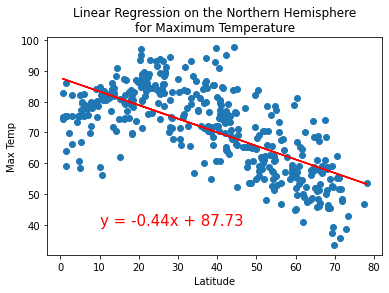

In [163]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

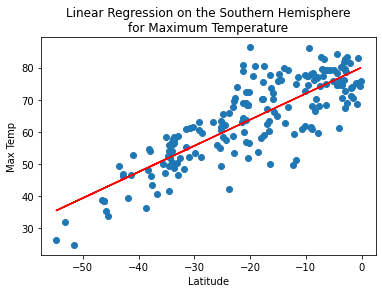

In [164]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

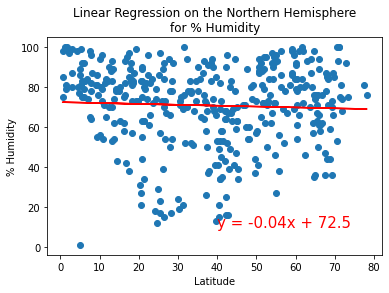

In [166]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

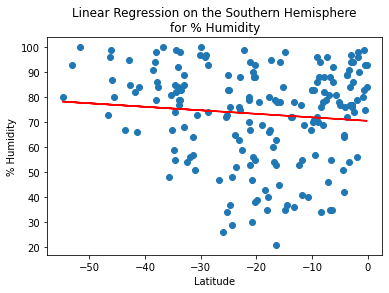

In [167]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

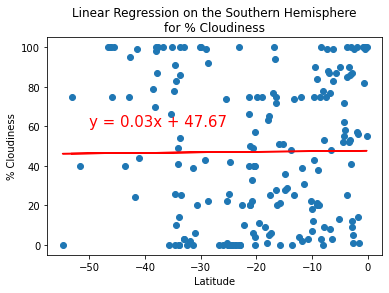

In [169]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

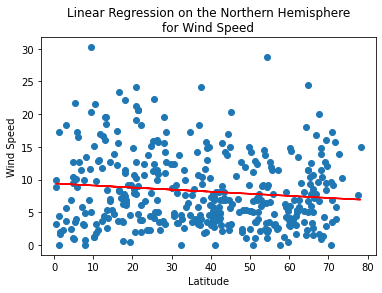

In [171]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))


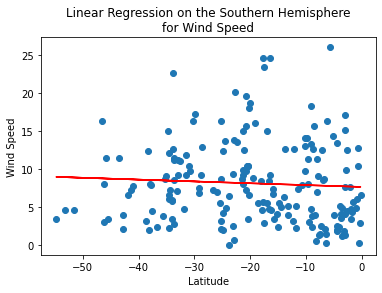

In [172]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))